# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_test
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import (
    balanced_accuracy_1interval_score,
    mean_absolute_1interval_error,
)

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


First we will do the tuning of the model that predicts the final position of each driver at a ±1 interval.


In [2]:
df = pd.read_csv("../assets/data/processed/additional.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [
    make_scorer(balanced_accuracy_1interval_score),
    make_scorer(mean_absolute_1interval_error, greater_is_better=False),
]

X = pd.read_csv("../assets/data/processed/additional_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.4420402303925031
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.1687271729284916
              precision    recall  f1-score   support

           1       0.56      0.89      0.69       252
           2       0.58      0.90      0.70       252
           3       0.49      0.75      0.59       252
           4       0.54      0.48      0.51       252
           5       0.51      0.38      0.44       252
           6       0.40      0.46      0.43       252
           7       0.38      0.48      0.43       252
           8       0.38      0.41      0.40       252
           9       0.41      0.38      0.39       252
          10       0.39      0.44      0.42       252
          11       0.40      0.30      0.35       252
          12       0.44      0.37      0.40       252
          13       0.34      0.46      0.39       252
          14 

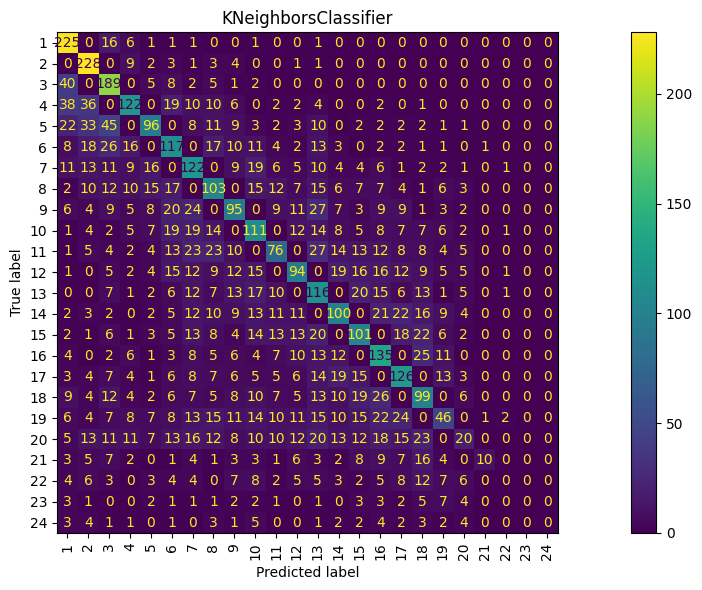

In [3]:
X_selected = X[
    [
        "positionGrid",
        "constructorRef",
        "driverWins",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
    ]
]
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X_selected, y, tscv, scorers=scorers, interval=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3731904858609404
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.5435910503967247
              precision    recall  f1-score   support

           1       0.47      0.89      0.61       252
           2       0.64      0.84      0.72       252
           3       0.48      0.54      0.51       252
           4       0.50      0.42      0.46       252
           5       0.45      0.35      0.40       252
           6       0.31      0.43      0.36       252
           7       0.33      0.39      0.36       252
           8       0.36      0.36      0.36       252
           9       0.29      0.28      0.28       252
          10       0.26      0.28      0.27       252
          11       0.33      0.32      0.32       252
          12       0.31      0.34      0.33       252
          13       0.29      0.40      0.34       252
          14 

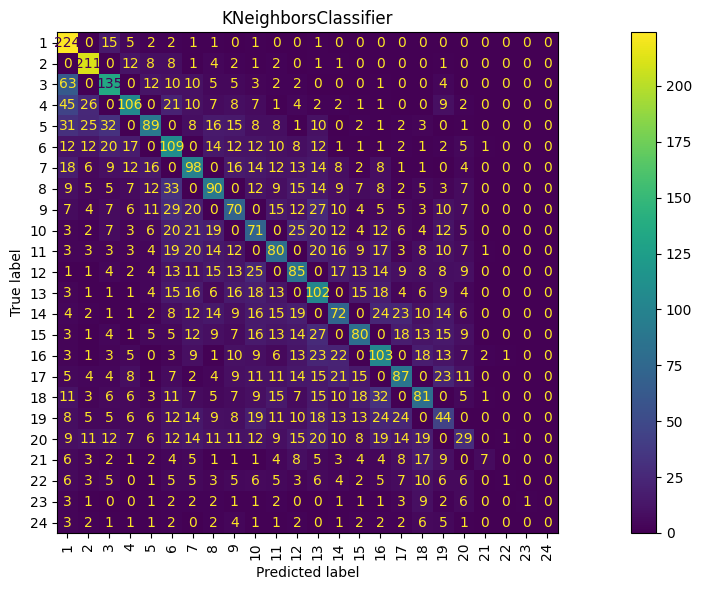

In [4]:
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X, y, tscv, scorers=scorers, interval=1)

## Decision Tree


DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.35845161992889274
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.712971699180464
              precision    recall  f1-score   support

           1       0.70      0.82      0.75       252
           2       0.67      0.74      0.70       252
           3       0.49      0.67      0.57       252
           4       0.45      0.64      0.53       252
           5       0.37      0.47      0.41       252
           6       0.35      0.45      0.40       252
           7       0.23      0.44      0.30       252
           8       0.41      0.31      0.35       252
           9       0.17      0.18      0.18       252
          10       0.41      0.25      0.31       252
          11       0.17      0.20      0.18       252
          12       0.28      0.30      0.29       252
          13       0.26      0.23      0.24       252
          14       0.35      0.32 

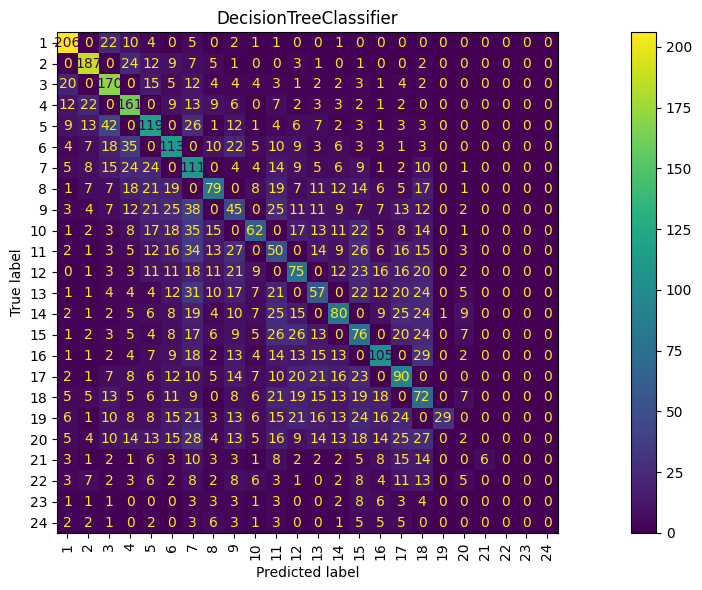

In [5]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "raceTime",
        "circuitLocation",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "q1",
        "q2",
        "q3",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
    ]
]
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X_selected, y, tscv, scorers=scorers, interval=1)

DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3544364684137412
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.7411480600247016
              precision    recall  f1-score   support

           1       0.70      0.82      0.75       252
           2       0.67      0.73      0.70       252
           3       0.48      0.64      0.55       252
           4       0.44      0.62      0.52       252
           5       0.40      0.46      0.43       252
           6       0.34      0.43      0.38       252
           7       0.24      0.42      0.30       252
           8       0.43      0.31      0.36       252
           9       0.16      0.15      0.15       252
          10       0.41      0.24      0.30       252
          11       0.14      0.20      0.17       252
          12       0.30      0.30      0.30       252
          13       0.23      0.24      0.23       252
          14       0.35      0.33 

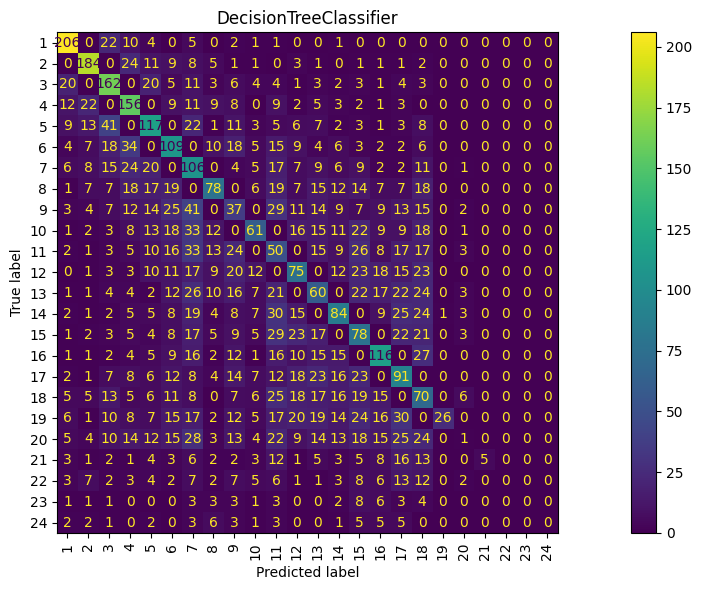

In [6]:
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, interval=1)

## Random Forest


RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.46002612076475713
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.0172186609834735
              precision    recall  f1-score   support

           1       0.62      0.93      0.74       252
           2       0.58      0.90      0.70       252
           3       0.50      0.78      0.61       252
           4       0.54      0.63      0.58       252
           5       0.44      0.52      0.48       252
           6       0.47      0.46      0.47       252
           7       0.39      0.43      0.41       252
           8       0.42      0.38      0.40       252
           9       0.42      0.45      0.44       252
          10       0.33      0.36      0.35       252
          11       0.52      0.38      0.44       252
          12       0.31      0.44      0.37       252
          13       0.42      0.44      0.43       252
          14   

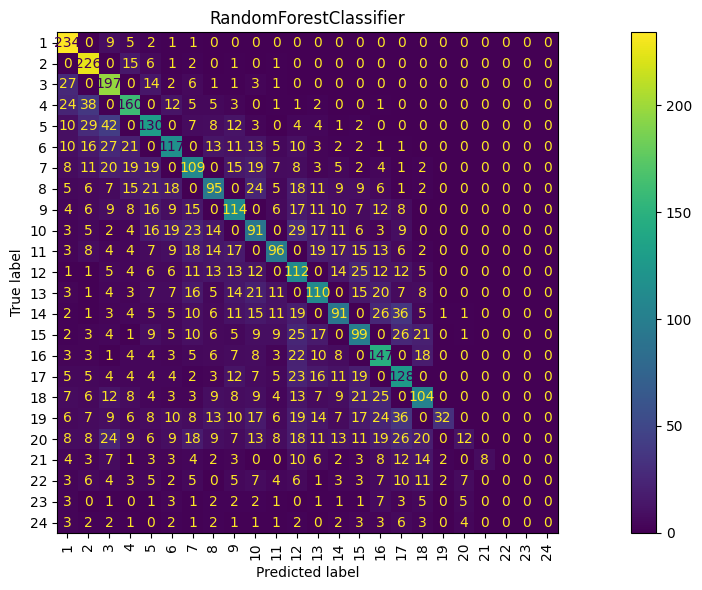

In [7]:
X_selected = X[
    [
        "positionGrid",
        "driverRef",
        "driverNationality",
        "constructorNationality",
        "grandPrix",
        "circuitRef",
        "driverWins",
        "constructorWins",
        "q1",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
    ]
]
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X_selected, y, tscv, scorers=scorers, interval=1)

RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.45669880624426085
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.091878343371751
              precision    recall  f1-score   support

           1       0.59      0.92      0.72       252
           2       0.59      0.91      0.72       252
           3       0.47      0.78      0.59       252
           4       0.55      0.64      0.59       252
           5       0.45      0.45      0.45       252
           6       0.48      0.50      0.49       252
           7       0.40      0.44      0.42       252
           8       0.45      0.37      0.41       252
           9       0.36      0.38      0.37       252
          10       0.37      0.42      0.39       252
          11       0.46      0.33      0.39       252
          12       0.37      0.44      0.40       252
          13       0.41      0.44      0.43       252
          14    

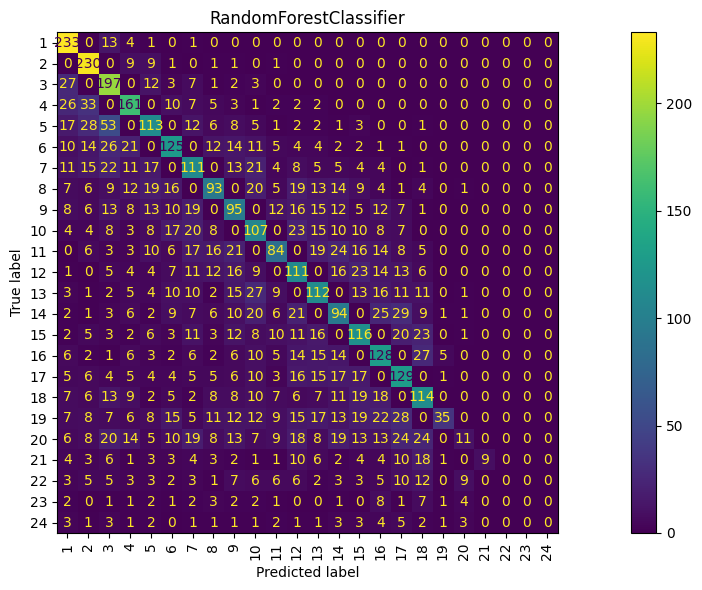

In [8]:
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X, y, tscv, scorers=scorers, interval=1)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.42192669704033336
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.9781211689808362
              precision    recall  f1-score   support

           1       0.59      0.89      0.71       252
           2       0.71      0.79      0.75       252
           3       0.55      0.56      0.56       252
           4       0.55      0.60      0.57       252
           5       0.42      0.60      0.50       252
           6       0.38      0.57      0.46       252
           7       0.45      0.46      0.45       252
           8       0.29      0.30      0.29       252
           9       0.38      0.36      0.37       252
          10       0.30      0.41      0.35       252
          11       0.35      0.41      0.38       252
          12       0.30      0.41      0.34       252
          13       0.43      0.44      0.44       252

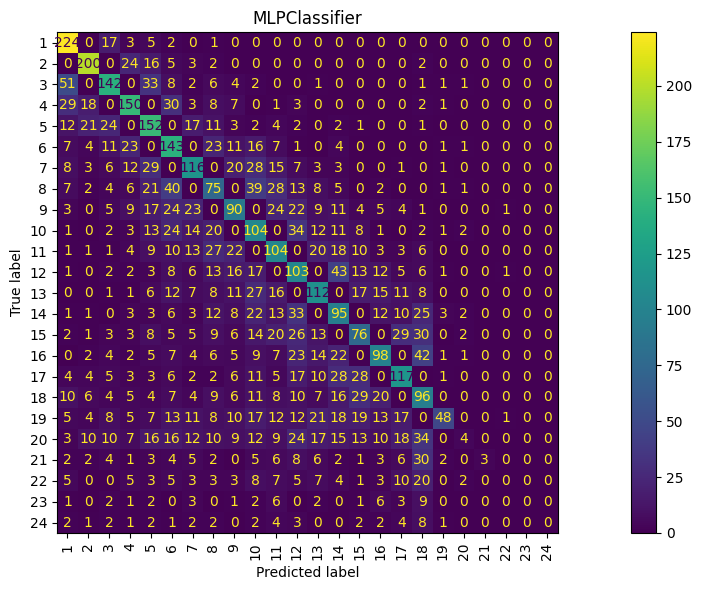

In [9]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "circuitRef",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "driverAgeToday",
        "driverAgeAtRace",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X_selected, y, tscv, scorers=scorers, interval=1)

MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.42277736573191116
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.986878321903277
              precision    recall  f1-score   support

           1       0.62      0.87      0.72       252
           2       0.72      0.81      0.77       252
           3       0.56      0.52      0.54       252
           4       0.59      0.58      0.58       252
           5       0.38      0.62      0.47       252
           6       0.42      0.60      0.49       252
           7       0.37      0.44      0.40       252
           8       0.33      0.31      0.32       252
           9       0.46      0.37      0.41       252
          10       0.27      0.39      0.32       252
          11       0.33      0.43      0.37       252
          12       0.34      0.44      0.39       252
          13       0.32      0.38      0.35       252


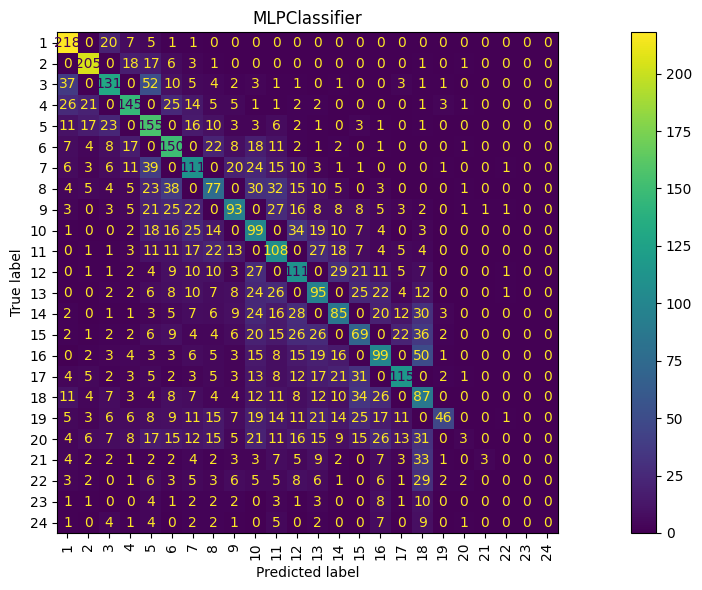

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X, y, tscv, scorers=scorers, interval=1)

## Results


Based on the model in the previous section, i.e. with optimised attributes, performance has improved.

With all attributes, we have improved the performance of the model. Note that we have greatly increased the number of attributes, so here it would be convenient to redo selection and tuning.
